## App Rating Prediction
#### by Anmol Khera

In [478]:
# importing necessary libraries pandas, numpy, matplotlib.pyplot, seaborn

In [479]:
import pandas as pd              #pandas library for data handling and manipulation
import numpy as np               #numpy library for statistical calculations
import matplotlib.pyplot as plt  #matplotlib library for data visualisation
import seaborn as sns            #seaborn library is also a data visualisation tool but with more interactive and customisation

### 1. Loading google playstore data file using pandas library.

In [480]:
df_google=pd.read_csv('googleplaystore.csv')

In [481]:
df_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [482]:
df_google.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2. Checking null values using isnull() function.

In [483]:
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3. Drop records with nulls in any of the columns.

In [484]:
df_google.dropna(inplace=True)
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [485]:
df_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 4) Fixing incorrect formatting and type:

          1. Size column has sizes in Kb as well as Mb. To analyze, we need to convert these to numeric. To rectify this we                  need to remove Mb and Kb from the column.

             > After removing Kb and Mb we will get the numeric value from the column.

             > We need to multiply the value by 1000, if size is mentioned in Mb.

In [486]:
df_google['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [487]:
df_google = df_google[-df_google["Size"].str.contains("Var")]

In [488]:
df_google.loc[:,"size_numeric"] = df_google.Size.str.rstrip("Mk+,")

In [489]:
df_google['size_numeric']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: size_numeric, Length: 7723, dtype: object

In [490]:
df_google['size_numeric']=df_google['size_numeric'].astype(float) #after getting numeric value we will convert it into float

In [491]:
df_google['size_numeric']

0         19.0
1         14.0
2          8.7
3         25.0
4          2.8
         ...  
10833    619.0
10834      2.6
10836     53.0
10837      3.6
10840     19.0
Name: size_numeric, Length: 7723, dtype: float64

In [492]:
df_google["size_numeric"] =np.where(df_google["Size"].str.contains("M"),df_google["size_numeric"]*1000,df_google.size_numeric)

In [493]:
df_google["size_numeric"]

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: size_numeric, Length: 7723, dtype: float64

###  4)   
     2. Reviews is a numeric field that is loaded as a string field. We need to convert it to integer.

In [494]:
df_google['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: object

In [495]:
df_google['Reviews']=df_google['Reviews'].astype(int)

In [496]:
df_google['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: int32

###  4)
3. Installs field is currently stored as string and has values like 1,000,000+. 

       Treating 1,000,000+ as 1,000,000, removing ‘+’, ‘,’ from the field and converting it to integer.

In [497]:
df_google['Installs']=df_google['Installs'].str.replace('+','')
df_google['Installs']=df_google['Installs'].str.replace(',','')

C:\Users\anmol\AppData\Local\Temp\ipykernel_12976\1294824947.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_google['Installs']=df_google['Installs'].str.replace('+','')


In [498]:
df_google['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: object

In [499]:
df_google["Installs"] = df_google["Installs"].astype(int) #after removing "+" and "," , we need to convert it into integer.

In [500]:
df_google["Installs"] 

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int32

### 4)
4. Price field is a string and has Dollar symbol. 
    We need to remove Dollar sign, and convert it to float.

In [501]:
df_google['Price']=df_google['Price'].str.replace('$','')

C:\Users\anmol\AppData\Local\Temp\ipykernel_12976\2158437878.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_google['Price']=df_google['Price'].str.replace('$','')


In [502]:
df_google['Price']=df_google['Price'].astype(float)

In [503]:
df_google['Price'].dtype

dtype('float64')

### 5) Sanity checks:

1. Average rating should be between 1 and 5 as only these values are allowed on the play store. We need to drop the rows that have a value outside this range.

In [504]:
df_google = df_google[(df_google.Rating>=1) & (df_google.Rating<=5)]

In [505]:
df_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
size_numeric      0
dtype: int64

### 5) Sanity checks:

2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, we need to drop them.

In [506]:
df_google.drop(df_google.index[df_google.Reviews>df_google.Installs],axis=0,inplace=True)

In [507]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   int32  
 4   Size            7717 non-null   object 
 5   Installs        7717 non-null   int32  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
 13  size_numeric    7717 non-null   float64
dtypes: float64(3), int32(2), object(9)
memory usage: 844.0+ KB


### 5)
3. For free apps (type = “Free”), the price should not be >0. We need to drop any such rows.

In [508]:
df_google[(df_google["Type"]=="Free") & (df_google["Price"]>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_numeric


In [509]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   int32  
 4   Size            7717 non-null   object 
 5   Installs        7717 non-null   int32  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
 13  size_numeric    7717 non-null   float64
dtypes: float64(3), int32(2), object(9)
memory usage: 844.0+ KB


### 5) Performing univariate analysis: 

1. Boxplot for Price

2. Boxplot for Reviews

If there are any outliers, we need to identify them.

3. Histogram for Rating

4. Histogram for Size

Histogram will let us know the skewness of the "Rating" and "Size"

### 5)
1. Boxplot for Price

<AxesSubplot:xlabel='Price'>

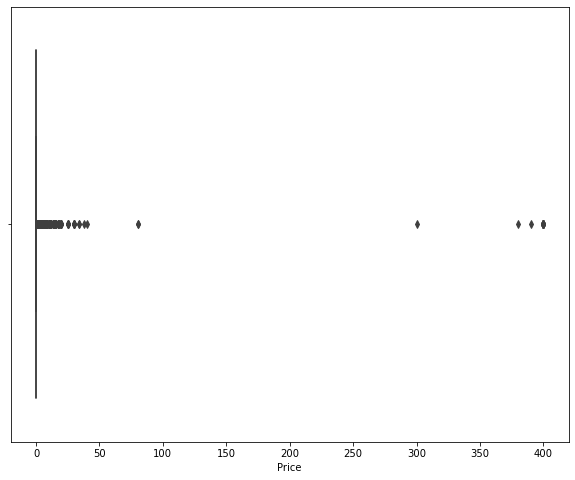

In [510]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_google,x='Price')

### Analysis:
#### From the above boxplot, 60 and above prices are Outliers

### 5)
2. Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

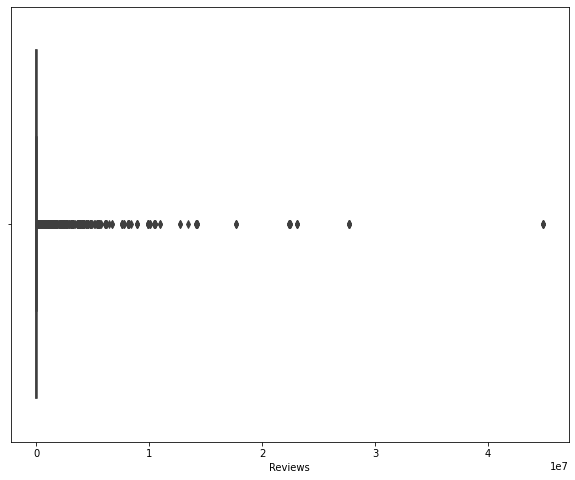

In [511]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_google,x='Reviews')

### Analysis:
#### From the above boxplot, we can say that there are some Apps having higher number of reviews

### 5)
3. Histogram for Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

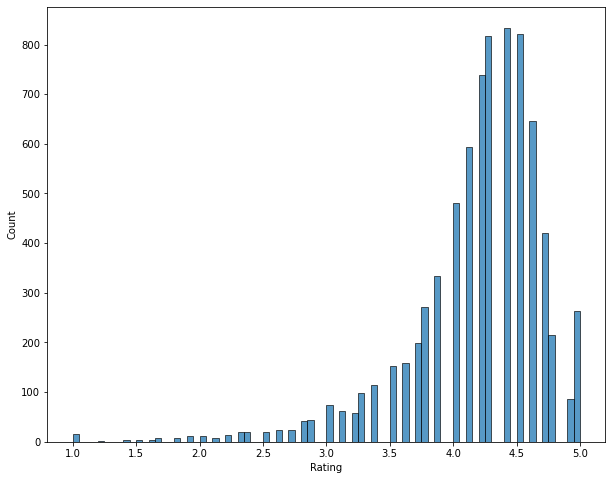

In [512]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_google,x='Rating')

### Analysis:
#### From the above histogram, we can clearly see it is negatively skewed i.e., some apps have higher rating than usual.

### 5)
4. Histogram for Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

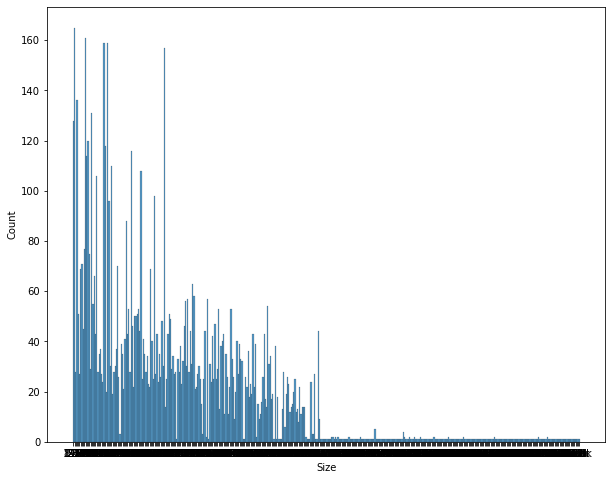

In [513]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_google,x='Size')

### Analysis:
#### From the above histogram, we can see there is positive skewness.

### 6) Outlier treatment: 

    1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on        the Play Store is very high and suspicious!

        >We need to check out the records with very high price. 
        >We need to drop those rows which have equal or above $200 as most of thems are junk apps.

In [514]:
df_google.loc[df_google['Price']>200].shape[0]

15

In [515]:
df_google.drop(df_google[df_google['Price']>200].index,inplace=True)

In [516]:
df_google.shape

(7702, 14)

### 6) Outlier Treatment:
2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and,        in fact, will skew it.
    
        >We need to drop those records having more than 2 million reviews.

In [517]:
df_google.loc[df_google['Reviews']>2000000].shape[0]

219

In [518]:
df_google.drop(df_google[df_google['Reviews']>2000000].index,inplace=True)

In [519]:
df_google.shape

(7483, 14)

### 6) Outlier Treatment:
3. Installs: There are some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

        >We need to find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

        >We also need to decide a threshold as cutoff for outlier and drop records having values more than that.

In [520]:
df_google.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99],axis=0) #quantile() is use to calculate percentile of all the columns in the data

,Rating,Reviews,Installs,Price,size_numeric
0.10,3.5,13.00,1000.0,0.00,2500.0
0.25,4.0,99.00,10000.0,0.00,5100.0
0.50,4.3,2026.00,100000.0,0.00,14000.0
0.70,4.5,20295.60,1000000.0,0.00,26000.0
0.90,4.7,180385.40,10000000.0,0.00,56000.0
0.95,4.8,407660.30,10000000.0,1.99,72900.0
0.99,5.0,1242884.16,50000000.0,8.99,96000.0


In [521]:
# Dropping more than 10000000 Installs value
df_google.drop(df_google[df_google['Installs'] > 10000000].index, inplace = True)

In [522]:
df_google.shape

(7307, 14)

### 7. Bivariate analysis: Let’s us look at how the available predictors relate to the variable of interest, i.e., our target variable rating. We need to make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### 7)
1. Scatter plot for Rating vs. Price

<AxesSubplot:xlabel='Rating', ylabel='Price'>

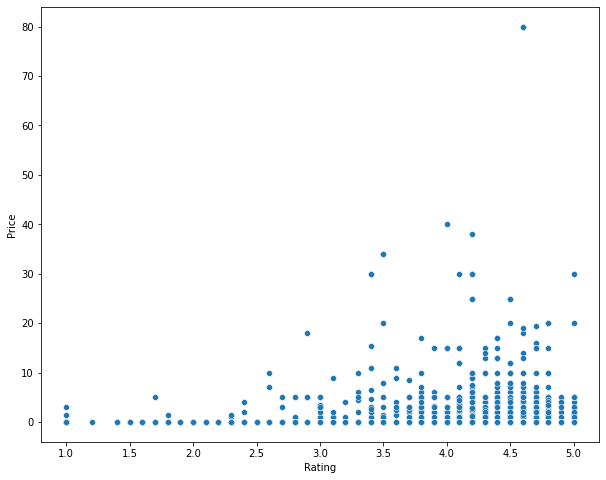

In [523]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_google,x='Rating',y='Price')

### Analysis:
#### Positive correlation can be seen in above scatter plot, i.e., Ratings increases with increase in Price.

### 7)
2. Scatter plot for Rating vs. Size

<AxesSubplot:xlabel='Rating', ylabel='size_numeric'>

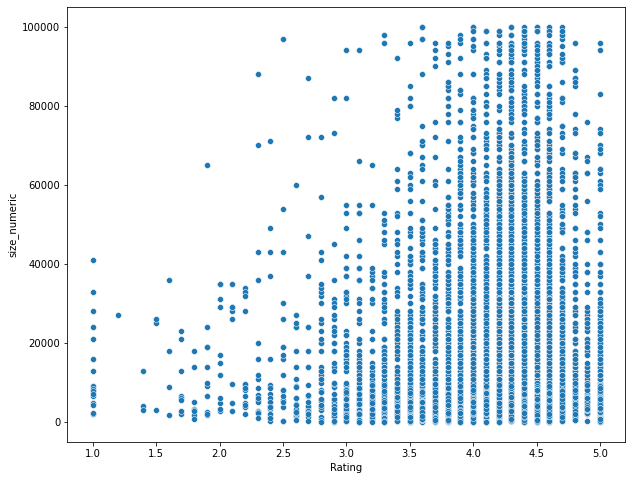

In [524]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_google,x='Rating',y='size_numeric')

### Analysis:
#### Positive correlation can be seen in above scatter plot, i.e., Ratings increases with increase in Size.

### 7)
3. Scatter plot for Rating vs. Reviews

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

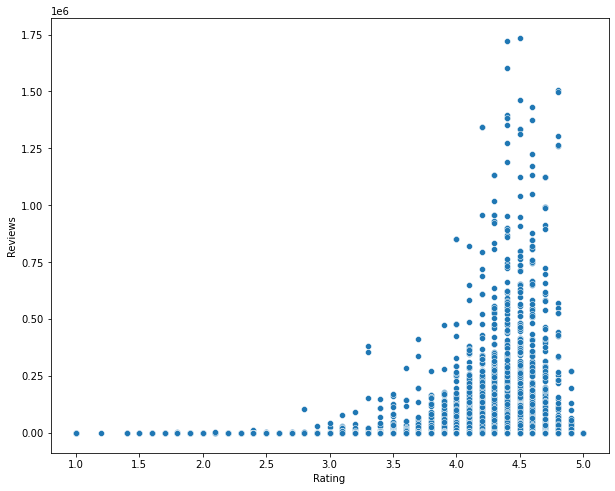

In [525]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_google, x='Rating', y='Reviews')

### Analysis:
#### Positive correlation can be seen in above scatter plot, i.e., Ratings increasing with increase in Reviews.

### 7)
4. Boxplot for Rating vs. Content Rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

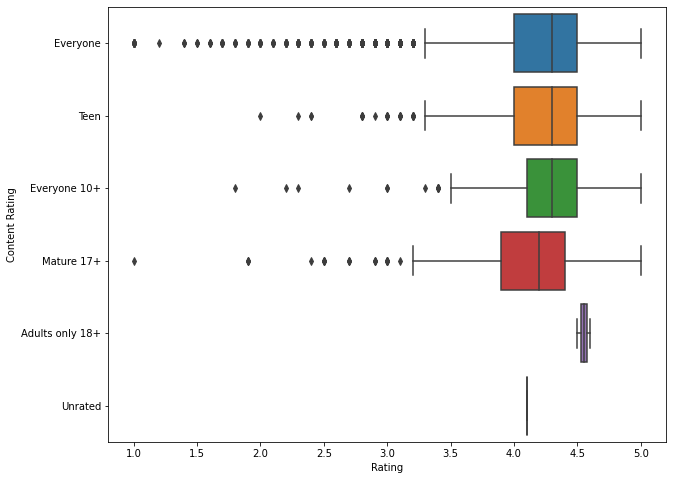

In [526]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_google,x='Rating',y='Content Rating')

### Analysis:
#### Those apps which are categorised in content rating for everyone have more bad ratings compare to other sections because of number of oulier count, while 18+ apps have better ratings as they don't have any outlier.

### 7)
5. Boxplot for Ratings vs. Category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

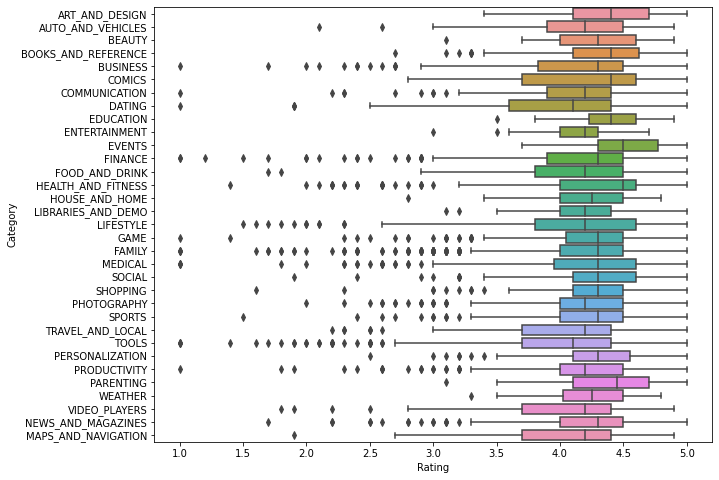

In [527]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_google,x='Rating',y='Category')

### Analysis:
#### In categories, event have best ratings compare to others as it contains no ouliers.

### 8) Data preprocessing

1. For data processing, we need to create a copy of the dataframe to make all the edits. We will name it inp1.

2. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need to reduce the skew. We will apply log transformation (np.log1p) to Reviews and Installs.

In [528]:
inp1=df_google.copy(deep=True) #DataFrame.copy() is used to make a copy of dataframe.

In [529]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600.0


In [530]:
inp1.skew()

C:\Users\anmol\AppData\Local\Temp\ipykernel_12976\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating          -1.692510
Reviews          5.305328
Installs         1.922597
Price           15.724184
size_numeric     1.533259
dtype: float64

In [531]:
skew_Reviews=np.log1p(inp1['Reviews']) #we use numpy to apply log transformation

In [532]:
skew_Reviews.skew()

-0.06808430177422442

In [533]:
skew_Installs=np.log1p(inp1['Installs'])

In [534]:
skew_Installs.skew()

-0.3930918801065247

### 8)
3. We need to drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [535]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Size','Type'],axis=1,inplace=True)

In [536]:
inp1.head()

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,size_numeric
0,ART_AND_DESIGN,4.1,159,10000,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,967,500000,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,ART_AND_DESIGN,4.7,87510,5000000,0.0,Everyone,Art & Design,8700.0
4,ART_AND_DESIGN,4.3,967,100000,0.0,Everyone,Art & Design;Creativity,2800.0
5,ART_AND_DESIGN,4.4,167,50000,0.0,Everyone,Art & Design,5600.0


### 8)
4. We need to get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. We will name our dataframe inp2.

In [537]:
inp2=inp1.copy(deep=True)

In [538]:
inp2.head()

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,size_numeric
0,ART_AND_DESIGN,4.1,159,10000,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,967,500000,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,ART_AND_DESIGN,4.7,87510,5000000,0.0,Everyone,Art & Design,8700.0
4,ART_AND_DESIGN,4.3,967,100000,0.0,Everyone,Art & Design;Creativity,2800.0
5,ART_AND_DESIGN,4.4,167,50000,0.0,Everyone,Art & Design,5600.0


In [539]:
#First we will create dummies for Category.

In [540]:
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [541]:
dummy=pd.get_dummies(inp2['Category']) #get_dummies() is used to create dummy variables

In [542]:
dummy.shape

(7307, 33)

In [543]:
dummy=dummy.rename(columns=lambda x: x+'_Category') #we will rename the dummy columns to understand that these are created from Category.

In [544]:
inp2=pd.concat([inp2,dummy],axis=1) #concat function is use to merge two dataframes.

In [545]:
del inp2['Category'] #we don't need Category as we have created dummies. So we will use del command.

In [546]:
inp2.head()

,Rating,Reviews,Installs,Price,Content Rating,Genres,size_numeric,ART_AND_DESIGN_Category,AUTO_AND_VEHICLES_Category,BEAUTY_Category,...,PERSONALIZATION_Category,PHOTOGRAPHY_Category,PRODUCTIVITY_Category,SHOPPING_Category,SOCIAL_Category,SPORTS_Category,TOOLS_Category,TRAVEL_AND_LOCAL_Category,VIDEO_PLAYERS_Category,WEATHER_Category
0,4.1,159,10000,0.0,Everyone,Art & Design,19000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,500000,0.0,Everyone,Art & Design;Pretend Play,14000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,5000000,0.0,Everyone,Art & Design,8700.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,100000,0.0,Everyone,Art & Design;Creativity,2800.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,50000,0.0,Everyone,Art & Design,5600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [547]:
inp2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain 

In [548]:
#Now we will create dummies for Genres.

In [549]:
inp2['Genres'].value_counts()

Tools                          607
Entertainment                  427
Education                      417
Medical                        323
Lifestyle                      272
                              ... 
Board;Pretend Play               1
Arcade;Pretend Play              1
Music & Audio;Music & Video      1
Parenting;Brain Games            1
Strategy;Creativity              1
Name: Genres, Length: 112, dtype: int64

In [550]:
# We need to reduce some categories that dont have any impact on making model

In [551]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Others' if i in lists else i for i in inp2.Genres]

In [552]:
# Those genres category that have value count less then 20 will be stored in Others

In [553]:
inp2['Genres'].unique()

array(['Art & Design', 'Others', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Trivia',
       'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino'], dtype=object)

In [554]:
dummy_genres=pd.get_dummies(inp2['Genres'])

In [555]:
dummy_genres.shape

(7307, 51)

In [556]:
dummy_genres=dummy_genres.rename(columns=lambda x: x+'_Genres')

In [557]:
inp2=pd.concat([inp2,dummy_genres],axis=1)

In [558]:
del inp2['Genres']

In [559]:
inp2.head()

,Rating,Reviews,Installs,Price,Content Rating,size_numeric,ART_AND_DESIGN_Category,AUTO_AND_VEHICLES_Category,BEAUTY_Category,BOOKS_AND_REFERENCE_Category,...,Simulation_Genres,Social_Genres,Sports_Genres,Strategy_Genres,Tools_Genres,Travel & Local_Genres,Trivia_Genres,Video Players & Editors_Genres,Weather_Genres,Word_Genres
0,4.1,159,10000,0.0,Everyone,19000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,500000,0.0,Everyone,14000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,5000000,0.0,Everyone,8700.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,100000,0.0,Everyone,2800.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,50000,0.0,Everyone,5600.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [560]:
# We will create dummies for Content Rating.

In [561]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [562]:
dummy_content=pd.get_dummies(inp2['Content Rating'])

In [563]:
dummy_content=dummy_content.rename(columns=lambda x: x+'_Content Rating')

In [564]:
inp2=pd.concat([inp2,dummy_content],axis=1)

In [565]:
del inp2['Content Rating']

In [566]:
inp2.head()

,Rating,Reviews,Installs,Price,size_numeric,ART_AND_DESIGN_Category,AUTO_AND_VEHICLES_Category,BEAUTY_Category,BOOKS_AND_REFERENCE_Category,BUSINESS_Category,...,Trivia_Genres,Video Players & Editors_Genres,Weather_Genres,Word_Genres,Adults only 18+_Content Rating,Everyone_Content Rating,Everyone 10+_Content Rating,Mature 17+_Content Rating,Teen_Content Rating,Unrated_Content Rating
0,4.1,159,10000,0.0,19000.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,500000,0.0,14000.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,5000000,0.0,8700.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,100000,0.0,2800.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167,50000,0.0,5600.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [567]:
inp2.shape

(7307, 95)

### 9) Now we will use train test split  and apply 70-30 split.

In [568]:
#Importing necessary libraries for model buuiling.

In [569]:
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as R2
from sklearn import metrics

In [570]:
data_ml=inp2.copy(deep=True)

In [571]:
x=data_ml.drop('Rating',axis=1) #here x will be independent variable and y will be dependent.
y=data_ml['Rating']

### 10) Now we will separate the dataframes into x_train, y_train, x_test, and y_test.

In [572]:
x_train,x_test,y_train,y_test=ms.train_test_split(x,
                                                  y,
                                                  test_size=0.3,
                                                  random_state=1234)

### 11) Model building

1. For model building, we use linear regression as the technique.
2. Then we will calculate mean squared score on the train set.

In [573]:
lr_model=lr()

In [574]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [575]:
r2_train=lr_model.score(x_train,y_train)

In [576]:
r2_train

0.0636941388370903

### 12) Now we will make predictions on test set and report R2 score.

In [474]:
y_pred=lr_model.predict(x_test)

In [475]:
r2_pred=R2(y_pred,y_test)
print (r2_pred)

0.28501229633746233


In [476]:
r2_test=lr_model.score(x_test,y_test)

In [477]:
r2_test

0.04389942305736938